In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical 
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, RandomRotation, RandomContrast, RandomBrightness
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

import tensorflow as tf

2023-05-26 03:55:28.341675: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2023-05-26 03:55:29.706264: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-26 03:55:29.712599: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-26 03:55:29.714436: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# Definitions

In [3]:
WIDTH, HEIGHT = IMAGE_SIZE = (256, 256)
DEPTH = 3
DATASET_PATH = "dataset"
EPOCS = 100

# Data Preprocessing

### Preprocessing the Training set

In [4]:
training_datagen = ImageDataGenerator(rescale = 1./255,
                                       horizontal_flip = True,
                                       vertical_flip = True,
                                       width_shift_range = 0.1,
                                       height_shift_range = 0.1,
                                       rotation_range = 90,
                                       validation_split = 0.3)

training_set = training_datagen.flow_from_directory(DATASET_PATH,
                                                     target_size=IMAGE_SIZE,
                                                     batch_size=32,
                                                     seed=11,
                                                     class_mode = 'sparse',
                                                     subset = "training",
                                                     color_mode="grayscale")
test_set = training_datagen.flow_from_directory(DATASET_PATH,
                                                     target_size=IMAGE_SIZE,
                                                     batch_size=32,
                                                     seed=11,
                                                     class_mode = 'sparse',
                                                     subset = "validation",
                                                     color_mode="grayscale")

Found 226 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


In [5]:
class_indices = training_set.class_indices
num_classes = len(class_indices)
train_labels = training_set.classes
train_labels = to_categorical(train_labels, num_classes=len(class_indices))
class_indices

{'9V': 0, 'AA': 1, 'AAA': 2, 'D': 3, 'Unknown': 4}

# Building the CNN


In [6]:
model = Sequential()
model.add(RandomRotation(0.1))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(HEIGHT, WIDTH, DEPTH)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes))

2023-05-26 03:55:29.802678: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-26 03:55:29.808934: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-26 03:55:29.812857: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Part 3 - Training the CNN

### Compiling the CNN

### Training the CNN on the Training set and evaluating it on the Test set

In [8]:
history = model.fit(x = training_set, validation_data = test_set, epochs = EPOCS)

2023-05-26 03:55:31.158313: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


Epoch 1/100


2023-05-26 03:55:31.848333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-26 03:55:32.921697: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f929c40c4b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-26 03:55:32.921738: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2023-05-26 03:55:32.924817: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-26 03:55:33.010516: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most

8/8 [==============================] - ETA: 0s - loss: 1.7711 - accuracy: 0.2124

2023-05-26 03:55:35.535241: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


8/8 [==============================] - 4s 264ms/step - loss: 1.7711 - accuracy: 0.2124 - val_loss: 1.5508 - val_accuracy: 0.2935
Epoch 2/100
8/8 [==============================] - 1s 186ms/step - loss: 1.5707 - accuracy: 0.2832 - val_loss: 1.5540 - val_accuracy: 0.2935
Epoch 3/100
8/8 [==============================] - 1s 207ms/step - loss: 1.5551 - accuracy: 0.2876 - val_loss: 1.5328 - val_accuracy: 0.3043
Epoch 4/100
8/8 [==============================] - 1s 186ms/step - loss: 1.5483 - accuracy: 0.2743 - val_loss: 1.5711 - val_accuracy: 0.2935
Epoch 5/100
8/8 [==============================] - 1s 186ms/step - loss: 1.5720 - accuracy: 0.2965 - val_loss: 1.5325 - val_accuracy: 0.3043
Epoch 6/100
8/8 [==============================] - 1s 202ms/step - loss: 1.5392 - accuracy: 0.2876 - val_loss: 1.5276 - val_accuracy: 0.2609
Epoch 7/100
8/8 [==============================] - 1s 182ms/step - loss: 1.5355 - accuracy: 0.3009 - val_loss: 1.5712 - val_accuracy: 0.3261
Epoch 8/100
8/8 [========

Epoch 59/100
8/8 [==============================] - 1s 186ms/step - loss: 1.4896 - accuracy: 0.3186 - val_loss: 1.5526 - val_accuracy: 0.3152
Epoch 60/100
8/8 [==============================] - 1s 186ms/step - loss: 1.5003 - accuracy: 0.3230 - val_loss: 1.5222 - val_accuracy: 0.3043
Epoch 61/100
8/8 [==============================] - 1s 185ms/step - loss: 1.4595 - accuracy: 0.3407 - val_loss: 1.5535 - val_accuracy: 0.2826
Epoch 62/100
8/8 [==============================] - 1s 182ms/step - loss: 1.4711 - accuracy: 0.3540 - val_loss: 1.5386 - val_accuracy: 0.2826
Epoch 63/100
8/8 [==============================] - 1s 182ms/step - loss: 1.4732 - accuracy: 0.3142 - val_loss: 1.5155 - val_accuracy: 0.3152
Epoch 64/100
8/8 [==============================] - 1s 186ms/step - loss: 1.4776 - accuracy: 0.3319 - val_loss: 1.5036 - val_accuracy: 0.3152
Epoch 65/100
8/8 [==============================] - 1s 183ms/step - loss: 1.4700 - accuracy: 0.3363 - val_loss: 1.6960 - val_accuracy: 0.1957
Epoch 

2023-05-26 03:58:02.379263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 - 0s - loss: 1.5295 - accuracy: 0.3043 - 420ms/epoch - 140ms/step


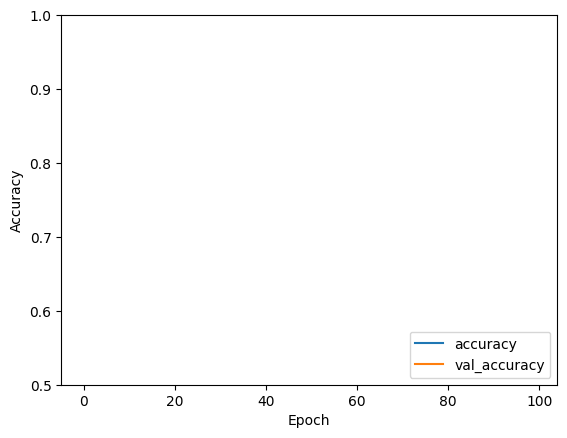

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_set, verbose=2)

In [10]:
print(test_acc)

0.30434781312942505


# Saving the model

In [11]:
MODEL = f'models/model_w{WIDTH}_acc{test_acc}_{datetime.now().isoformat()}'
model.save(MODEL)

2023-05-26 03:58:03.039413: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'random_rotation_input' with dtype float and shape [?,256,256,1]
	 [[{{node random_rotation_input}}]]
2023-05-26 03:58:03.101265: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,256,256,1]
	 [[{{node inputs}}]]
2023-05-26 03:58:03.118425: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'random_rotation_input' with dtype float

INFO:tensorflow:Assets written to: models/model_w256_acc0.30434781312942505_2023-05-26T03:58:02.924688/assets


INFO:tensorflow:Assets written to: models/model_w256_acc0.30434781312942505_2023-05-26T03:58:02.924688/assets


## Converting to TF Lite

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [13]:
tfmodel = converter.convert()

2023-05-26 03:58:04.006515: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'random_rotation_input' with dtype float and shape [?,256,256,1]
	 [[{{node random_rotation_input}}]]
2023-05-26 03:58:04.065752: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,256,256,1]
	 [[{{node inputs}}]]
2023-05-26 03:58:04.082838: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'random_rotation_input' with dtype float

INFO:tensorflow:Assets written to: /tmp/tmpw1tj22u8/assets


INFO:tensorflow:Assets written to: /tmp/tmpw1tj22u8/assets
2023-05-26 03:58:05.480589: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-05-26 03:58:05.480618: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-05-26 03:58:05.480882: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpw1tj22u8
2023-05-26 03:58:05.482168: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-05-26 03:58:05.482178: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpw1tj22u8
2023-05-26 03:58:05.487296: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-05-26 03:58:05.488360: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-05-26 03:58:05.559096: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio

In [14]:
f = tf.io.gfile.GFile(f'{MODEL}.tflite', 'wb')
f.write(tfmodel)
f.close()

In [15]:
f'{MODEL}.tflite'

'models/model_w256_acc0.30434781312942505_2023-05-26T03:58:02.924688.tflite'